# Proyek Analisis Data: Air Quality Dataset

- **Nama:** Letmi syara
- **Email:** letmisyara31@gmail.com
- **ID Dicoding:** letmisyara

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara harian, bulanan, atau tahunan di kota tersebut?
- Apakah terdapat hubungan antara polutan utama (misalnya, PM2.5) dengan kondisi lingkungan seperti suhu?
- apa polusi yang paling banyak di seluruh kota?


## Import Semua Packages/Library yang Digunakan

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

## Data Wrangling

### Gathering Data

In [36]:
from google.colab import drive
drive.mount('/content/drive')  # Mount to /content/drive

data_dir = '/content/drive/MyDrive/Air-quality-dataset/'  # Access your data within MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# opening datasets individually
Aotizhongxin = pd.read_csv(data_dir + 'PRSA_Data_Aotizhongxin_20130301-20170228.csv')
Changping = pd.read_csv(data_dir + 'PRSA_Data_Changping_20130301-20170228.csv')
Dingling = pd.read_csv(data_dir + 'PRSA_Data_Dingling_20130301-20170228.csv')
Dongsi = pd.read_csv(data_dir + 'PRSA_Data_Dongsi_20130301-20170228.csv')
Guanyuan = pd.read_csv(data_dir + 'PRSA_Data_Guanyuan_20130301-20170228.csv')
Gucheng = pd.read_csv(data_dir + 'PRSA_Data_Gucheng_20130301-20170228.csv')
Huairou = pd.read_csv(data_dir + 'PRSA_Data_Huairou_20130301-20170228.csv')
Nongzhanguan = pd.read_csv(data_dir + 'PRSA_Data_Nongzhanguan_20130301-20170228.csv')
Shunyi = pd.read_csv(data_dir + 'PRSA_Data_Shunyi_20130301-20170228.csv')
Tiantan = pd.read_csv(data_dir + 'PRSA_Data_Tiantan_20130301-20170228.csv')
Wanliu = pd.read_csv(data_dir + 'PRSA_Data_Wanliu_20130301-20170228.csv')
Wanshouxigong = pd.read_csv(data_dir + 'PRSA_Data_Wanshouxigong_20130301-20170228.csv')

data = {'Aotizhongxin': Aotizhongxin,
        'Changping': Changping,
        'Dingling': Dingling,
        'Dongsi': Dongsi,
        'Guanyuan': Guanyuan,
        'Gucheng': Gucheng,
        'Huairou': Huairou,
        'Nongzhanguan': Nongzhanguan,
        'Shunyi': Shunyi,
        'Tiantan': Tiantan,
        'Wanliu': Wanliu,
        'Wanshouxigong': Wanshouxigong,}


In [38]:
data['Aotizhongxin'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [39]:
data['Changping'].head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [40]:
data['Dingling'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [41]:
data['Dongsi'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [42]:
data['Guanyuan'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [43]:
data['Gucheng'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [44]:
data['Huairou'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [45]:
data['Nongzhanguan'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [46]:
data['Shunyi'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [47]:
data['Tiantan'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [48]:
data['Wanliu'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [49]:
data['Wanshouxigong'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


Insight
- Terdapat 13 lokasi dari dataset air quality dataset
- Setiap lokasi mempunyai data tahun, bulan, hari, jam, PM2.5, PM10, SO2, NO2, CO, O3, suhu(TEMP), tekanan udara(pres), kelembaban (dewp), hujan(rain), wd, kecepatan angin(WSPM), dan station


### Assessing Data

Melihat semua tipe data

In [50]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entri

menyatukan semua data

In [51]:
# Path to the folder containing the CSV file
path = data_dir
all_files = glob.glob(path + "*.csv")

# Read and merge all CSV files
df_list = []
for file in all_files:
    city_df = pd.read_csv(file)
    city_df['station'] = file.split("/")[-1].replace(".csv", "")
    df_list.append(city_df)


melihat data yang terduplikat

In [52]:
# Initialize a dictionary to store duplicate counts and total sample counts
duplicate_counts = {}
total_sample_counts = {}

# Calculate and store the duplicate counts and total sample counts for each DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)  # Calculate the total number of samples

# Create DataFrames from the dictionaries
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# Combine the two DataFrames by concatenating them horizontally
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
Aotizhongxin,35064,0
Changping,35064,0
Dingling,35064,0
Dongsi,35064,0
Guanyuan,35064,0
Gucheng,35064,0
Huairou,35064,0
Nongzhanguan,35064,0
Shunyi,35064,0
Tiantan,35064,0


melihat missing value

In [53]:
# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(df_name, '\n', null_counts[df_name], '\n')

Aotizhongxin 
 No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64 

Changping 
 No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64 

Dingling 
 No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64 

Dongsi 
 No            0
year          0
month       

**Insight:**
- terdapat beberapa missing value di setiap lokasi dataset yang perlu di bersihkan

### Cleaning Data

In [54]:
input_folder = "Air-quality-dataset"
output_folder = "cleaned_data"
os.makedirs(output_folder, exist_ok=True)

# read main dataset
combined_data = pd.concat(df_list, ignore_index=True)

# Handle missing values
def clean_data(df):
    # Using interpolation for numeric values
    df.interpolate(method='linear', inplace=True)
    # Drop rows that still have missing values
    df.dropna(inplace=True)
    return df

# Clear merge data
cleaned_data = clean_data(combined_data)

# Save clean data to one file
combined_output_file = os.path.join(output_folder, "combined_cleaned_data.csv")
cleaned_data.to_csv(combined_output_file, index=False)
print(f"Combined cleaned data saved to {combined_output_file}")

'''# Jika ingin memisahkan kembali data per lokasi
stations = cleaned_data['station'].unique()
for station in stations:
    station_data = cleaned_data[cleaned_data['station'] == station]
    output_file = os.path.join(output_folder, f"{station}_cleaned.csv")
    station_data.to_csv(output_file, index=False)
    print(f"Cleaned data saved for {station}: {output_file}")'''

<ipython-input-54-95aa98f17f50>:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


Combined cleaned data saved to cleaned_data/combined_cleaned_data.csv


'# Jika ingin memisahkan kembali data per lokasi\nstations = cleaned_data[\'station\'].unique()\nfor station in stations:\n    station_data = cleaned_data[cleaned_data[\'station\'] == station]\n    output_file = os.path.join(output_folder, f"{station}_cleaned.csv")\n    station_data.to_csv(output_file, index=False)\n    print(f"Cleaned data saved for {station}: {output_file}")'

In [55]:
cleaned_file = "cleaned_data/combined_cleaned_data.csv"
cleaned_data = pd.read_csv(cleaned_file)

print("Data information:")
print(cleaned_data.info())

# Check  missing values
print("\nNumber Missing Values:")
print(cleaned_data.isnull().sum())


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418944 entries, 0 to 418943
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       418944 non-null  int64  
 1   year     418944 non-null  int64  
 2   month    418944 non-null  int64  
 3   day      418944 non-null  int64  
 4   hour     418944 non-null  int64  
 5   PM2.5    418944 non-null  float64
 6   PM10     418944 non-null  float64
 7   SO2      418944 non-null  float64
 8   NO2      418944 non-null  float64
 9   CO       418944 non-null  float64
 10  O3       418944 non-null  float64
 11  TEMP     418944 non-null  float64
 12  PRES     418944 non-null  float64
 13  DEWP     418944 non-null  float64
 14  RAIN     418944 non-null  float64
 15  wd       418944 non-null  object 
 16  WSPM     418944 non-null  float64
 17  station  418944 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.5+ MB
None

Number Missing Values

**Insight:**
- semua data sudah dibersihkan, tidak ada missing value lagi

## Exploratory Data Analysis (EDA)

### Explore ...

In [56]:
# Show the first few rows
print("\nData Sample (5 first rows):")
print(cleaned_data.head())


Data Sample (5 first rows):
   No  year  month  day  hour  PM2.5  PM10  SO2       NO2     CO    O3  TEMP  \
0   3  2013      3    1     2    5.0   5.0  3.0  2.000000  200.0  79.0  -3.0   
1   4  2013      3    1     3    6.0   6.0  3.0  2.666667  200.0  79.0  -3.6   
2   5  2013      3    1     4    5.0   5.0  3.0  3.333333  200.0  81.0  -3.5   
3   6  2013      3    1     5    6.0   6.0  3.0  4.000000  200.0  79.0  -4.5   
4   7  2013      3    1     6    5.0  10.0  3.0  4.000000  200.0  77.0  -4.5   

     PRES  DEWP  RAIN   wd  WSPM                               station  
0  1021.3 -19.9   0.0  ENE   0.2  PRSA_Data_Dingling_20130301-20170228  
1  1021.8 -19.1   0.0  NNE   1.0  PRSA_Data_Dingling_20130301-20170228  
2  1022.3 -19.4   0.0    N   2.1  PRSA_Data_Dingling_20130301-20170228  
3  1022.6 -19.5   0.0  NNW   1.7  PRSA_Data_Dingling_20130301-20170228  
4  1023.4 -19.5   0.0  NNW   1.8  PRSA_Data_Dingling_20130301-20170228  


In [57]:
# Descriptive statistics for all numeric columns
print(cleaned_data.describe())

# Descriptive statistics for selected columns
print(cleaned_data['PM2.5'].describe())

                  No           year          month            day  \
count  418944.000000  418944.000000  418944.000000  418944.000000   
mean    17488.022385    2014.657420       6.524025      15.722910   
std     10111.567448       1.175819       3.445256       8.801615   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8731.000000    2014.000000       4.000000       8.000000   
50%     17477.000000    2015.000000       7.000000      16.000000   
75%     26241.000000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  418944.000000  418944.000000  418944.000000  418944.000000   
mean       11.502564      79.751256     104.841505      15.926107   
std         6.916654      80.916925      92.400037      21.917468   
min         0.000000       2.000000       2.000000       0.285600   
25%         6.000000      20.0000

## Visualization & Explanatory Analysis

Setiap polutan (PM2.5, PM10, SO2, NO2, CO, O3) memiliki batas konsentrasi tertentu yang sesuai dengan tingkat kualitas udara. AQI biasanya dikelompokkan menjadi beberapa kategori:

    Baik: 0–50
    Sedang: 51–100
    Tidak sehat untuk kelompok sensitif: 101–150
    Tidak sehat: 151–200
    Sangat tidak sehat: 201–300
    Berbahaya: >300

In [58]:
# Define AQI breakpoints
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

def calculate_overall_aqi(row):
    aqi_values = []
    pollutants = ['CO', 'NO2', 'O3', 'SO2','PM2.5', 'PM10']
    for pollutant in pollutants:
        aqi = calculate_aqi(pollutant, row[pollutant])
        if aqi is not None:
            aqi_values.append(aqi)
    return max(aqi_values)

# Calculate AQI for each row
cleaned_data['AQI'] = cleaned_data.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

# Categorize AQI
cleaned_data['AQI Category'] = cleaned_data['AQI'].apply(categorize_aqi)
print(cleaned_data.head())

   No  year  month  day  hour  PM2.5  PM10  SO2       NO2     CO    O3  TEMP  \
0   3  2013      3    1     2    5.0   5.0  3.0  2.000000  200.0  79.0  -3.0   
1   4  2013      3    1     3    6.0   6.0  3.0  2.666667  200.0  79.0  -3.6   
2   5  2013      3    1     4    5.0   5.0  3.0  3.333333  200.0  81.0  -3.5   
3   6  2013      3    1     5    6.0   6.0  3.0  4.000000  200.0  79.0  -4.5   
4   7  2013      3    1     6    5.0  10.0  3.0  4.000000  200.0  77.0  -4.5   

     PRES  DEWP  RAIN   wd  WSPM                               station  AQI  \
0  1021.3 -19.9   0.0  ENE   0.2  PRSA_Data_Dingling_20130301-20170228  300   
1  1021.8 -19.1   0.0  NNE   1.0  PRSA_Data_Dingling_20130301-20170228  300   
2  1022.3 -19.4   0.0    N   2.1  PRSA_Data_Dingling_20130301-20170228  300   
3  1022.6 -19.5   0.0  NNW   1.7  PRSA_Data_Dingling_20130301-20170228  300   
4  1023.4 -19.5   0.0  NNW   1.8  PRSA_Data_Dingling_20130301-20170228  300   

     AQI Category  
0  Very Unhealthy  
1  V

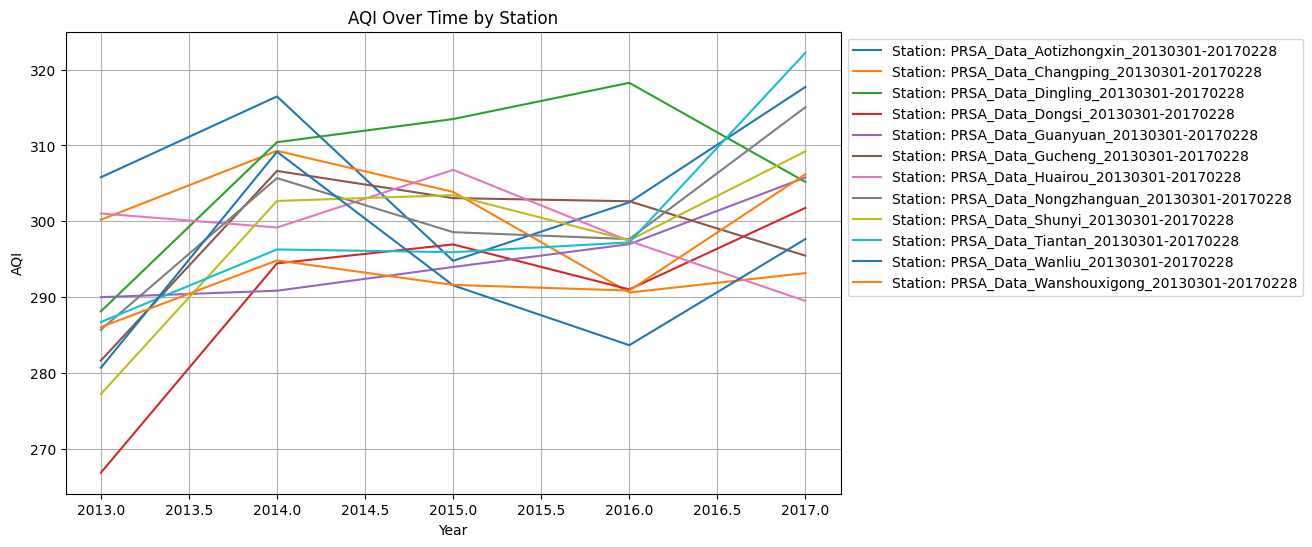

In [59]:
# aqi per years
station_avg_aqi = cleaned_data.groupby(['year', 'station'])['AQI'].mean().reset_index()

# Loop through each station and plot the AQI over time
plt.figure(figsize=(10, 6))
for station in station_avg_aqi['station'].unique():
    # Filter data for each station
    station_data = station_avg_aqi[station_avg_aqi['station'] == station]

    # Plot AQI over the years for the current station
    plt.plot(station_data['year'], station_data['AQI'], label=f"Station: {station}")

# Adding title and labels
plt.title('AQI Over Time by Station')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # To label each station
plt.grid(True)
plt.show()

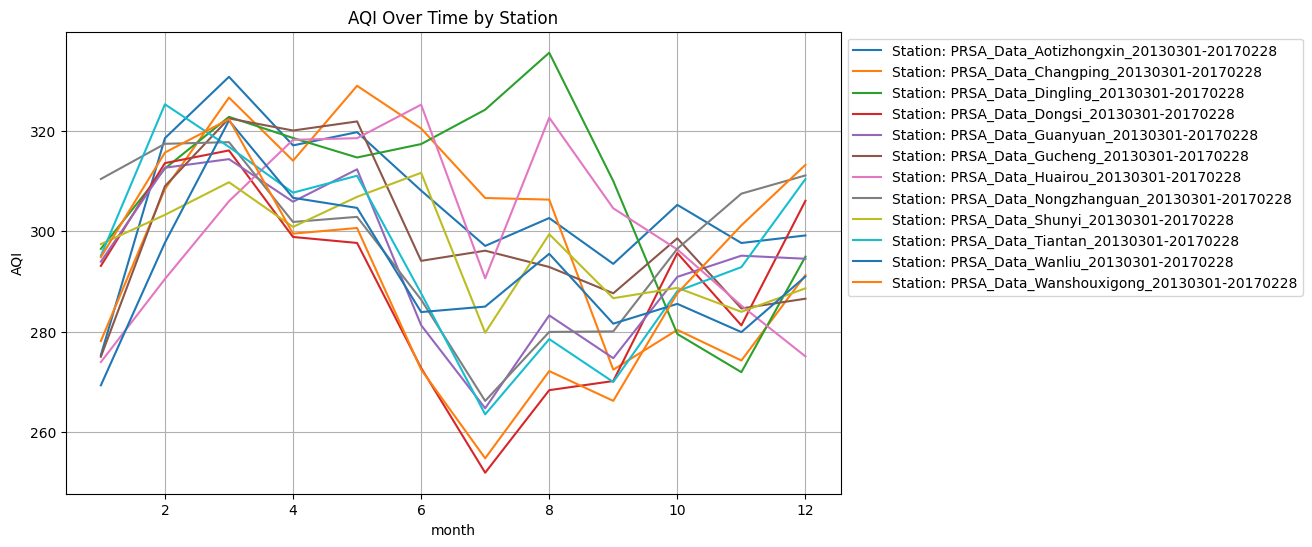

In [60]:
# aqi per months
station_avg_aqi = cleaned_data.groupby(['month', 'station'])['AQI'].mean().reset_index()

# Loop through each station and plot the AQI over time
plt.figure(figsize=(10, 6))
for station in station_avg_aqi['station'].unique():
    # Filter data for each station
    station_data = station_avg_aqi[station_avg_aqi['station'] == station]

    # Plot AQI over the years for the current station
    plt.plot(station_data['month'], station_data['AQI'], label=f"Station: {station}")

# Adding title and labels
plt.title('AQI Over Time by Station')
plt.xlabel('month')
plt.ylabel('AQI')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # To label each station
plt.grid(True)
plt.show()

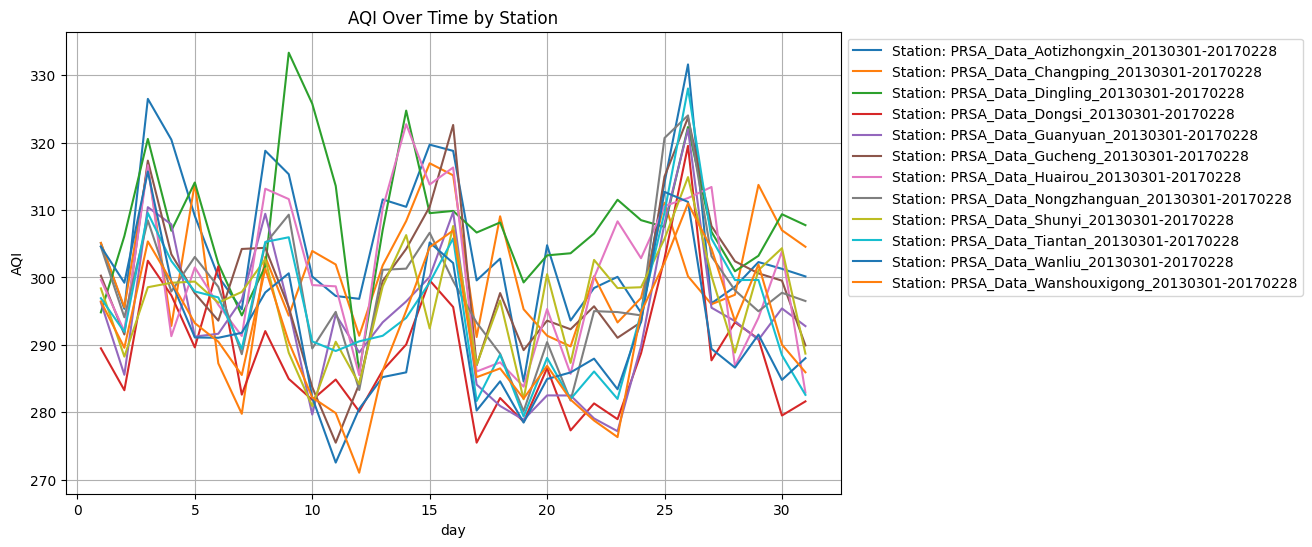

In [61]:
# aqi per days
station_avg_aqi = cleaned_data.groupby(['day', 'station'])['AQI'].mean().reset_index()

# Loop through each station and plot the AQI over time
plt.figure(figsize=(10, 6))
for station in station_avg_aqi['station'].unique():
    # Filter data for each station
    station_data = station_avg_aqi[station_avg_aqi['station'] == station]

    # Plot AQI over the years for the current station
    plt.plot(station_data['day'], station_data['AQI'], label=f"Station: {station}")

# Adding title and labels
plt.title('AQI Over Time by Station')
plt.xlabel('day')
plt.ylabel('AQI')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # To label each station
plt.grid(True)
plt.show()

In [62]:
station_avg_aqi = cleaned_data.groupby('station')['AQI'].mean().reset_index()

# Find the station with the highest average AQI
worst_station = station_avg_aqi.loc[station_avg_aqi['AQI'].idxmax()]

# Display the worst station and its AQI
print(f"The worst station is {worst_station['station']} with an average AQI of {worst_station['AQI']:.2f}")


The worst station is PRSA_Data_Dingling_20130301-20170228 with an average AQI of 308.26


In [63]:
# every stations
stations = cleaned_data['station'].unique()

### Pertanyaan 1:

bagaimana kualitas udara di setiap daerah? apakah kualitas udaranya masih dalam batas aman?

### Pertanyaan 2:

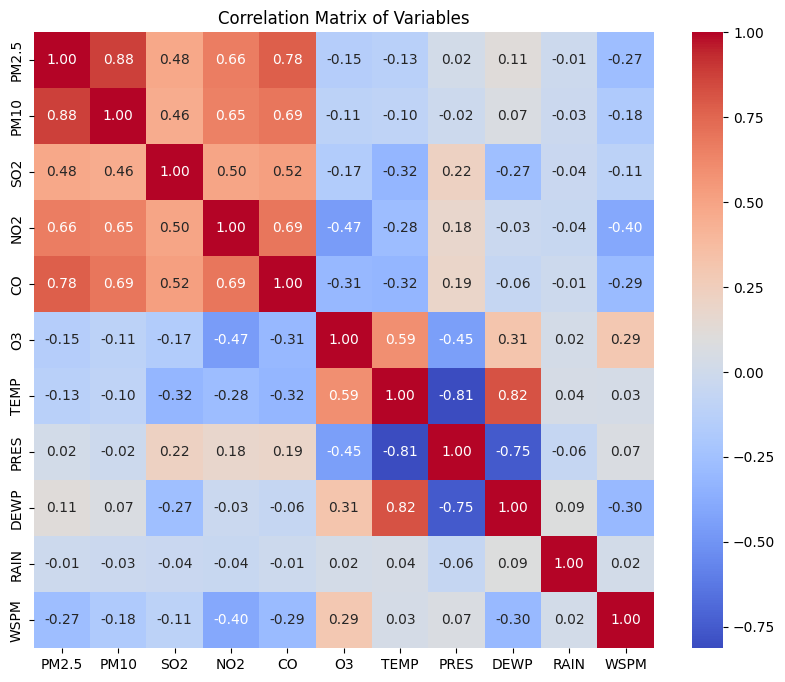

In [64]:
# correlation between variables
correlation_matrix = cleaned_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

# visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Variables")
plt.show()

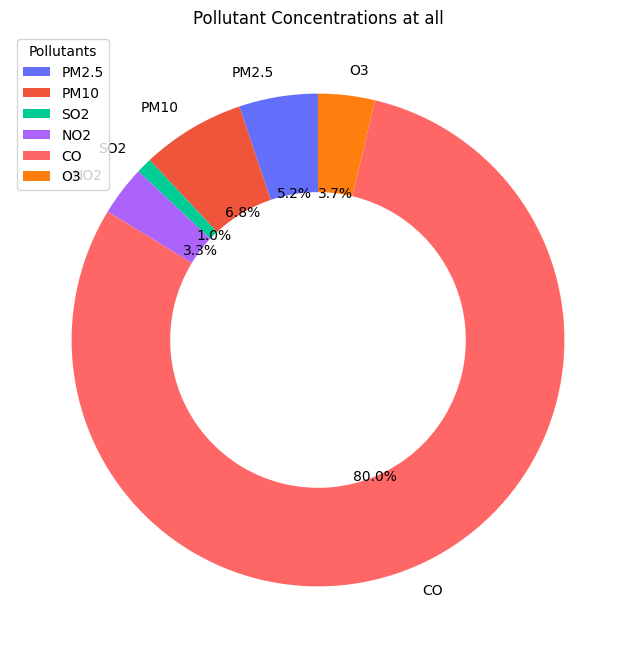

In [65]:
# Define pollutants and their colors
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
pollutant_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FF6666', '#FF7F0E']

# Calculate the sum of pollutant concentrations
total_concentrations = cleaned_data[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Donut plot
fig, ax = plt.subplots(figsize=(8, 8))

# Create a donut plot by setting the wedgeprops parameter
wedges, texts, autotexts = ax.pie(concentration_data['Concentration'], labels=concentration_data['Pollutant'],
                                  autopct='%1.1f%%', startangle=90, colors=pollutant_colors,
                                  wedgeprops=dict(width=0.4))

# Add a title to the plot
ax.set_title("Pollutant Concentrations at all")

# Add legend
ax.legend(wedges, concentration_data['Pollutant'], title="Pollutants", loc="upper left")

# Display the plot
plt.show()


## Conclusion

- **Bagaimana tren kualitas udara harian, bulanan, atau tahunan di kota tersebut?**
Dari tren harian, bulanan, atau tahunan, dapat diliha kualitas udara membaik atau memburuk seiring waktu. Ketika rata-rata AQI menunjukkan angka yang semakin tinggi, itu menunjukkan kualitas udara yang semakin buruk. Dimana rata-rata AQI paling tinggi terdapat di kota Dingling yaitu 308.26

- **Apakah terdapat hubungan antara polutan utama (misalnya, PM2.5) dengan kondisi lingkungan seperti suhu?**
Ditemukan korelasi positif antara PM2.5 dan suhu, ini menunjukkan bahwa peningkatan suhu dapat memperburuk polusi udara.

- **apa polusi yang paling banyak di seluruh kota?**
Berdasarkan data, dapat dilihat polutan mana yang dominan di setiap kota. Jika CO memiliki konsentrasi tertinggi yaitu sebesar 80%, setelah itu PM10 dengan nilai 6,8% dan PM2.5 senilai 5.2%